In [1]:
# This chunk sets echo = TRUE as default, that is print all code.
# knitr::opts_chunk$set can be used to set other notebook generation options, too.
# include=FALSE inside curly brackets makes this block not be included in the pdf.
knitr::opts_chunk$set(echo = TRUE)

# Exercise 1)

* probability: probability is a branch of mathematics that aims at describing the uncertainty around a set of possible events.

* probability mass: amount of uncertainty around an event in a discrete countable set.

* probability density: is the probability contained in a volume, when the volume is made arbitrary samall.

* probability mass function: a function that assigns probabilities to a countable discrete space.

* probability density function: a function that assigns a likelihood to a continuous space such that we can obtain the probability of an event falling between to events of this continuous space but for which the probability of a single event is 0.

* probability distribution: a function that describes the probability of an event.

* discrete probability distribution: up to my knowledge is the same as probability mass function.

* continuous probability distribution: up to my knowledge is the same as probability density function.

* cumulative distribution function: a function that gives the total probability that a random variable takes a value below a realization. 

* likelihood: is the unceratinty around an event given ( "usually" used when this uncertainty depends on some [non]-parametric statistical parameters).

# Exercise 2)

## a)

In [2]:
mean = 0.2
var  = 0.01

alfa = mean * ( mean * ( 1 - mean ) / var - 1 )
beta = alfa * ( 1 - mean ) / mean

In [3]:
x        = seq( from = -1, to = 1, by = 0.01 )
beta_pdf = dbeta( x , alfa, beta )  


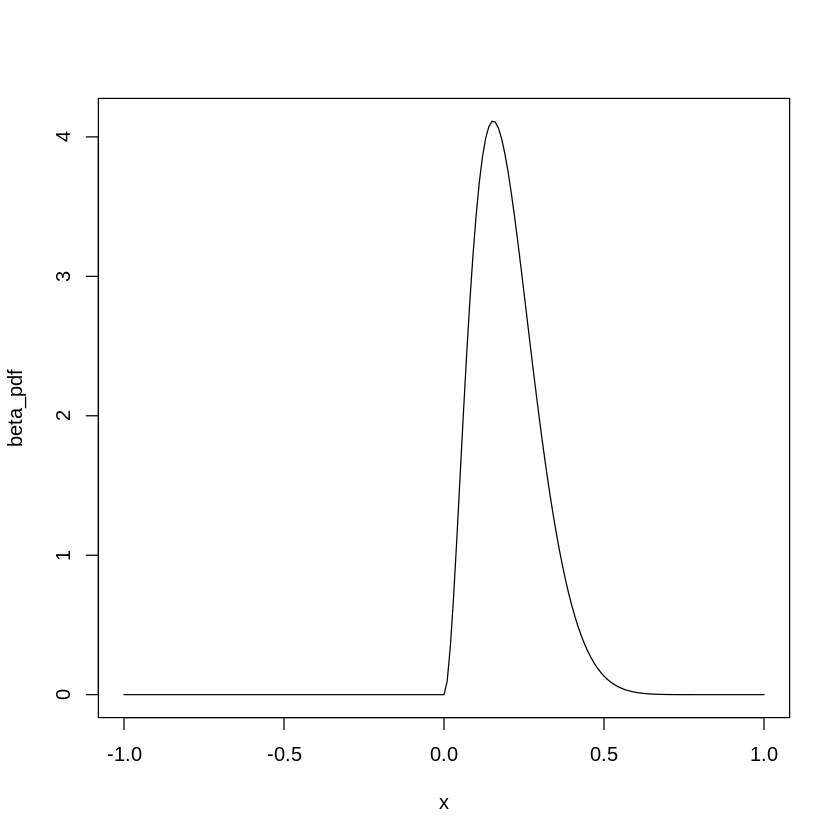

In [4]:
plot( x, beta_pdf, type = 'l')

## b)

In [5]:
beta_samples <- rbeta( x, alfa, beta )

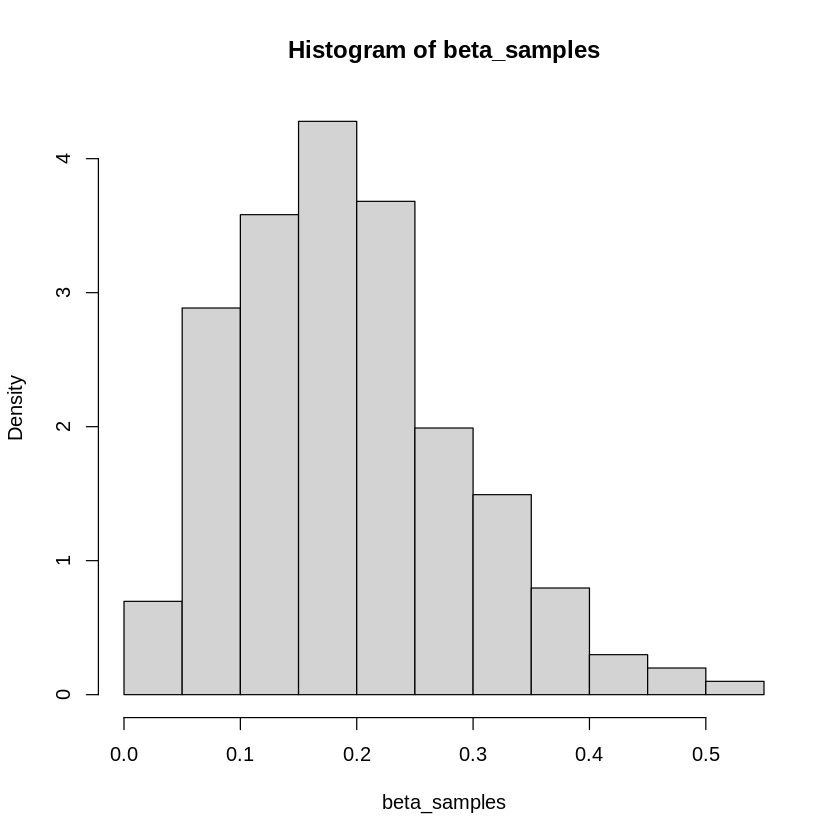

In [6]:
hist( beta_samples, freq = FALSE )

## c)

In [7]:
sprintf("Empirical mean %s" , mean(beta_samples))
sprintf("Empirical variance %s" , var(beta_samples))

sprintf("True mean %s", mean)
sprintf("True var %s", var)

[1] "Empirical mean 0.192320667133668"

[1] "Empirical variance 0.0098563857410929"

[1] "True mean 0.2"

[1] "True var 0.01"

## d)

In [8]:
quantiles_95 = quantile( beta_samples, probs = c(0.025, 0.975))
quantiles_95

2.5%     97.5% 
0.0419942 0.4232379

# Exercise 3)

$$
\begin{array}{c}
 p( \text{test_assigns_cancer} \mid \text{person_has_cancer}) &= 0.98 \\
 p( \text{test_assigns_NO_cancer} \mid \text{person_has_NO_cancer}) &= 0.96 \\
 p( \text{person_has_cancer} ) &= 0.001.
\end{array}
$$

We are interested in two probabilities which are:

$$
\begin{array}{c}
 p( \text{person_has_NO_cancer} \mid \text{test_assigns_cancer}) \\
 p( \text{person_has_cancer} \mid \text{test_assigns_NO_cancer}) 
\end{array}
$$

because with the former we will be giving medicine to someone does not need it and in the later the subject will die. Each of these probabilities can be obtained using bayes theorem as follows, which will allow us to identify which probabilities need to be estimated.

$$
p( \text{person_has_NO_cancer} \mid \text{test_assigns_cancer} ) = \frac{p(  \text{test_assigns_cancer} \mid \text{person_has_NO_cancer} ) \times p(\text{person_has_NO_cancer})}{ p(\text{test_assigns_cancer}) }
$$

and

$$
p( \text{person_has_cancer} \mid \text{test_assigns_NO_cancer}) = \frac{ p( \text{test_assigns_NO_cancer} \mid \text{person_has_cancer} ) \times p( \text{person_has_cancer})}{ p( \text{test_assigns_NO_cancer} )  }
$$

Some of the necessary probabilities have already been computed or are easy to compute:

$$
\begin{array}{c}
p( \text{test_assigns_NO_cancer} \mid \text{person_has_cancer}) &= 0.02 \\
 p( \text{test_assigns_cancer} \mid \text{person_has_NO_cancer}) &= 0.04 \\ 
p( \text{person_has_NO_cancer} ) &= 0.999\\
\end{array}
$$

Others can be computed using standard probability rules. In particular marginalization:


$$
p(\text{test_assigns_cancer}) = p(\text{test_assigns_cancer} \mid  \text{person_has_NO_cancer} ) \times p( \text{person_has_NO_cancer} ) + p(\text{test_assigns_cancer} \mid  \text{person_has_cancer} ) \times p(\text{person_has_cancer}) = 0.04 \times 0.999 + 0.98 \times 0.001 = 0.04094
$$

and

$$
p(\text{test_assigns_NO_cancer}) = p(\text{test_assigns_NO_cancer} \mid  \text{person_has_NO_cancer} ) \times p( \text{person_has_NO_cancer} ) + p(\text{test_assigns_NO_cancer} \mid  \text{person_has_cancer} ) \times p(\text{person_has_cancer}) = 0.96 \times 0.999 + 0.02 \times 0.001 = 0.95906
$$

We can check that:

$$
p(\text{test_assigns_cancer}) + p(\text{test_assigns_NO_cancer}) = 0.95906 + 0.04094 = 1.0
$$

as expected.

Substituting we have:

$$
p( \text{person_has_NO_cancer} \mid \text{test_assigns_cancer} ) = \frac{ 0.04 \times 0.999 }{ 0.04094 } = 0.976
$$

$$
p( \text{person_has_cancer} \mid \text{test_assigns_NO_cancer}) = \frac{ 0.02 \times 0.001}{ 0.95906 } = 2.085 \times 10^{-5}
$$

and finally:

$$
p( \text{person_has_cancer} \mid \text{test_assigns_cancer} ) = 1 - 0.976 =  0.024
$$

$$
p( \text{person_has_NO_cancer} \mid \text{test_assigns_NO_cancer}) = 1 - 2.085 \times 10^{-5} = 0.99998
$$


Based on these probabilities I would only use this test detector whenever if assigns NO_cancer, since it looks accurate. However when the test assigns cancer it fails and there would be many bald people in the world and any person with cancer would be probabily dead.

# Exercise 4)

Two state spaces with $\{R,W\}$ and $\{A,B,C\}$. The marginal and conditional probabilities are given by:

$$
p(A) = 0.4 \\
p(B) = 0.1 \\
p(C) = 0.5
$$

and

$$
p(R \mid A) = \frac{2}{7} \\
p(R \mid B) = \frac{4}{5} \\
p(R \mid C) = \frac{1}{4}
$$

## a)

So 

$$
\begin{array}{c}
p(R) &= P(R \mid A)\times p(A) + p(R \mid B)\times p(B) + p(R \mid C)\times p(C) \\
     &= 0.3192857142857143 
\end{array}
$$

## b)

We need to compute:

$$
    p(A \mid R) = \frac{p(R\mid A)\times p(A)}{p(R)} = 0.358
$$

$$
    p(B \mid R) = \frac{p(R\mid B)\times p(B)}{p(R)} = 0.25
$$

$$
    p(C \mid R) = \frac{p(R\mid C)\times p(C)}{p(R)} = 0.39
$$

So the conclusion is that it most probably come from C.

In [9]:
boxes <- matrix(
                 c(2,4,1,5,1,3)                  , 
                 ncol     = 2                    ,
                 dimnames = list(c("A", "B", "C"), 
                 c("red", "white"))
               )

boxes

,red,white
A,2,5
B,4,1
C,1,3


In [10]:
p_red <- function( boxes ){
    
   boxes["A",'red']  / sum( boxes["A",] ) * 0.4 +
   boxes["B",'red']  / sum( boxes["B",] ) * 0.1 + 
   boxes["C",'red']  / sum( boxes["C",] ) * 0.5 
   
} 

p_red(boxes = boxes)

[1] 0.3192857

In [11]:
p_box <- function( boxes ){
    
    p_red = p_red(boxes)
    
    p_AR = boxes["A",'red']  / sum( boxes["A",] ) * 0.4 / p_red
    p_BR = boxes["B",'red']  / sum( boxes["B",] ) * 0.1 / p_red
    p_CR = boxes["C",'red']  / sum( boxes["C",] ) * 0.5 / p_red
    
    c( p_AR, p_BR, p_CR )
    
}

p_box(boxes = boxes)

[1] 0.3579418 0.2505593 0.3914989

# Exercise 5)

From the exercise we know the following marginal probabilities:

$$
\begin{array}{c}
p(\text{boy})        &= 0.5 \\
p(\text{girl})       &= 0.5 \\
p(\text{fraternals}) &= \frac{1}{150}\\
p(\text{identicals}) &= \frac{1}{400}
\end{array}
$$

The exercise asks for:

$$
p(\text{identical} \mid \text{both boys}) = \frac{p(\text{both boys} \mid \text{identical}) \times p(\text{identical})}{p(\text{both boys})}
$$

Note that if we have an identical twin then the probability of being a boy or a girl is $0.5$, so:

$$
p(\text{ both boys} \mid \text{identical}) = 0.5
$$

On the other hand if we are fraternals then we have three states: both boys, both girls, boy and girl. Since events are independent we know:

$$
\begin{array}{c}
p(\text{both boys} \mid \text{fraternals})     &= 0.25 \\
p(\text{boy and girl} \mid \text{fraternals} ) &= 0.5  \\
p(\text{both girls} \mid \text{fraternals} )   &= 0.25 
\end{array}
$$

Note there is a difference. Because we know they are identical then the chance is only $0.5$, however when they are different we have four possibilities (two of them being equal which are boy and girl). This is why both boys have probability 0.25, except when we know they are identical twins, in which case the boy and girl case dissapear and that probability mass is divided between both boys and both girls.

This gives:

$$
p(\text{identical} \mid \text{both boys}) = \frac{p(\text{both boys} \mid \text{identical}) \times p(\text{identical})}{p(\text{both boys})} = \frac{0.5 \times \frac{1}{400}}{ 0.25 \times \frac{1}{150} + 0.5 \times \frac{1}{400}}  = 0.4286
$$

In [27]:
p_identical_twin <- function( fraternal_prob, identical_prob ){
    0.5 * identical_prob / ( 0.5 * identical_prob + 0.25 * fraternal_prob )
}
    
p_identical_twin( fraternal_prob = 1/150, identical_prob = 1/400 )    

[1] 0.4285714

## Mark Assignment

I am a conding rockstar!

In [28]:
library(markmyassignment)
assignment_path <-
paste("https://github.com/avehtari/BDA_course_Aalto/",
"blob/master/assignments/tests/assignment1.yml", sep="")
set_assignment(assignment_path)
# To check your code/functions, just run
mark_my_assignment()

Assignment set:
assignment1: Bayesian Data Analysis: Assignment 1
The assignment contain the following (3) tasks:
- p_red
- p_box
- p_identical_twin




✔ | F W S  OK | Context
✔ |         4 | p_red()
✔ |         4 | p_box()
✔ |         5 | p_identical_twin()

══ Results ════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════
[ FAIL 0 | WARN 0 | SKIP 0 | PASS 13 ]
You're a coding rockstar!